In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

from util import load_data, fdr, plot_report

%matplotlib inline

In [2]:
x_train, x_test, y_train, y_test = load_data('var_25.csv')
x_train.head()

,ssn_name_count_14,ssn_name_dob_count_14,ssn_lastname_count_14,ssn_firstname_count_14,ssn_dob_count_0_by_30,name_dob_count_0_by_30,fulladdress_homephone_count_14,fulladdress_count_1_by_14,fulladdress_homephone_day_since,ssn_dob_day_since,...,ssn_lastname_count_7,fulladdress_homephone_count_0_by_30,fulladdress_count_1_by_30,ssn_dob_count_7,ssn_count_0_by_30,fulladdress_count_0,name_dob_count_3,fulladdress_homephone_count_0_by_14,name_day_since,name_count_14
576442,-0.070962,-0.068281,-0.071051,-0.071088,0.162987,0.163303,-0.070089,0.123861,0.436256,0.428868,...,-0.057154,0.166392,0.174181,-0.055708,0.17291,-0.041351,-0.046415,0.120387,0.647457,-0.159376
259409,-0.070962,-0.068281,-0.071051,-0.071088,0.162987,0.163303,-0.070089,0.123861,-0.665001,-0.671704,...,-0.057154,0.166392,0.174181,-0.055708,0.17291,-0.041351,-0.046415,0.120387,-0.449122,-0.159376
485216,-0.070962,-0.068281,-0.071051,-0.071088,0.162987,0.163303,-0.070089,0.123861,-1.025757,-1.032237,...,-0.057154,0.166392,0.174181,-0.055708,0.17291,-0.041351,-0.046415,0.120387,-0.808346,-0.159376
372390,-0.070962,-0.068281,-0.071051,-0.071088,0.162987,0.163303,-0.070089,0.123861,-0.275763,-0.282709,...,-0.057154,0.166392,0.174181,-0.055708,0.17291,-0.041351,-0.046415,0.120387,-0.061538,-0.159376
689331,-0.070962,-0.068281,-0.071051,-0.071088,0.162987,0.163303,-0.070089,0.123861,0.825494,-0.358611,...,-0.057154,0.166392,0.174181,-0.055708,0.17291,-0.041351,-0.046415,0.120387,-0.137164,-0.159376


In [3]:
lr = LogisticRegression(max_iter=1000)
params = {'C': [10 ** i for i in range(-4, 1)],
          'class_weight': ['balanced', None]}
clf = GridSearchCV(lr, params, cv=10, refit='FDR', verbose=1,
                   n_jobs=4, scoring={'FDR': fdr, 'ROC': 'roc_auc'})
clf.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   55.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  7.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'class_weight': ['balanced', None]},
             pre_dispatch='2*n_jobs', refit='FDR', return_train_score=False,
             scoring={'FDR': <function fdr at 0x7fba1ef30268>,
                      'ROC': 'roc_auc'},
             verbose=1)

In [4]:
print(f"The best parameters are {clf.best_params_} "
      f"with a score of {clf.best_score_:0.5f}")

The best parameters are {'C': 0.1, 'class_weight': 'balanced'} with a score of 0.53199


In [5]:
pd.DataFrame(clf.cv_results_).filter(
    items=['mean_fit_time', 'mean_score_time',
           'params', 'mean_test_FDR','std_test_FDR',
           'rank_test_FDR', 'mean_test_ROC', 'std_test_ROC'])

,mean_fit_time,mean_score_time,params,mean_test_FDR,std_test_FDR,rank_test_FDR,mean_test_ROC,std_test_ROC
0,3.253965,0.537304,"{'C': 0.0001, 'class_weight': 'balanced'}",0.529288,0.011599,4,0.768731,0.006803
1,1.815509,0.560595,"{'C': 0.0001, 'class_weight': None}",0.522140,0.013325,6,0.765905,0.006530
2,5.726209,0.571122,"{'C': 0.001, 'class_weight': 'balanced'}",0.529027,0.011502,5,0.769563,0.006373
3,3.858616,0.621460,"{'C': 0.001, 'class_weight': None}",0.516387,0.013363,10,0.766542,0.006161
4,11.726470,0.620048,"{'C': 0.01, 'class_weight': 'balanced'}",0.531554,0.011575,3,0.769826,0.006422
5,8.318122,0.615861,"{'C': 0.01, 'class_weight': None}",0.516561,0.012850,9,0.767308,0.005145
6,25.521487,0.630717,"{'C': 0.1, 'class_weight': 'balanced'}",0.531990,0.012100,1,0.769728,0.006342
7,19.531959,0.636790,"{'C': 0.1, 'class_weight': None}",0.519002,0.013057,8,0.767840,0.004948
8,43.205458,0.641074,"{'C': 1, 'class_weight': 'balanced'}",0.531990,0.012100,1,0.769677,0.006278
9,33.755904,0.612665,"{'C': 1, 'class_weight': None}",0.519089,0.013543,7,0.767767,0.004855


FDR: 0.5234508729887025

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    197079
           1       0.22      0.53      0.31      2921

    accuracy                           0.97    200000
   macro avg       0.61      0.75      0.65    200000
weighted avg       0.98      0.97      0.97    200000



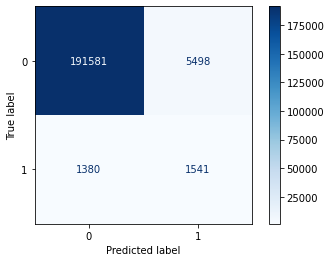

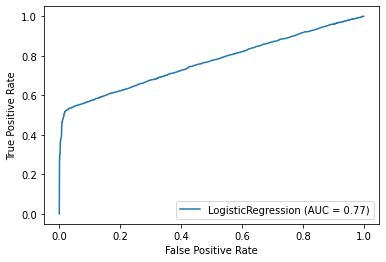

In [6]:
lr = LogisticRegression(max_iter=1000, **clf.best_params_).fit(x_train, y_train)
plot_report(lr, x_test, y_test)

In [10]:
x_train, x_test, y_train, y_test = load_data('var_40.csv')
lr = LogisticRegression(max_iter=1000, C=0.1, class_weight='balanced').fit(x_train, y_train)
print(fdr(lr, x_train, y_train))
print(fdr(lr, x_test, y_test))

0.5352161785216178
0.5292707976720301


In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
ee = EasyEnsembleClassifier(base_estimator=LogisticRegression(C=0.1, max_iter=1000),
                            n_estimators=20,
                            n_jobs=2,
                            verbose=0).fit(x_train, y_train)
print(fdr(ee, x_test, y_test))